                                            EDA (ANALISIS EXPLORATORIO DE DATOS)

Se importan las librerias necesarias para graficar y extraer los datos de la API

In [34]:
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Se hace la conexión con la API con ayuda de la libreria `pycoingecko`

In [2]:
#Crear un cliente
cg=CoinGeckoAPI()
#Confirmar conexion
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

Se obtiene toda la lista de monedas disponibles para luego extraer las monedas de interes de esta lista

In [3]:
coinlist=cg.get_coins_list()
coinDataframe=pd.DataFrame.from_dict(coinlist).sort_values('id').reset_index(drop=True)
coinDataframe

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
10209,zyberswap,zyb,Zyberswap
10210,zynecoin,zyn,Zynecoin
10211,zynergy,zyn,Zynergy
10212,zyx,zyx,ZYX


Se escogen las 10 monedas de las que se quiere hacer el estudio


In [5]:
coins=['Bitcoin','Dogecoin','Cardano','Metacade','Ethereum','Chainlink','Solana','Polygon','XRP','Litecoin']
coinDataframe[coinDataframe['name'].isin(coins) ]  

,id,symbol,name
1170,bitcoin,btc,Bitcoin
1639,cardano,ada,Cardano
1757,chainlink,link,Chainlink
2718,dogecoin,doge,Dogecoin
3132,ethereum,eth,Ethereum
5121,litecoin,ltc,Litecoin
5408,matic-network,matic,Polygon
5572,metacade,mcade,Metacade
7536,ripple,xrp,XRP
8107,solana,sol,Solana


                                                 Capitalización en el mercado

Se extrae información de capitalización de mercado, volumen y datos fundamentales para evaluar la posibilidad de invertir actualmente.

In [6]:
coins_id=['bitcoin','dogecoin','cardano','metacade','ethereum','chainlink','solana','matic-network','ripple','litecoin']
coinsData=cg.get_coins_markets(vs_currency='usd',ids=coins_id)
coinsData_df=pd.DataFrame.from_dict(coinsData)
coinsData_df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

Se hace un grafico de barras evaluando el `current_price` de cada criptomoneda, el cliente accedera a la moneda que mas se ajuste a su presupuesto teniendo en cuenta los posteriores analisis

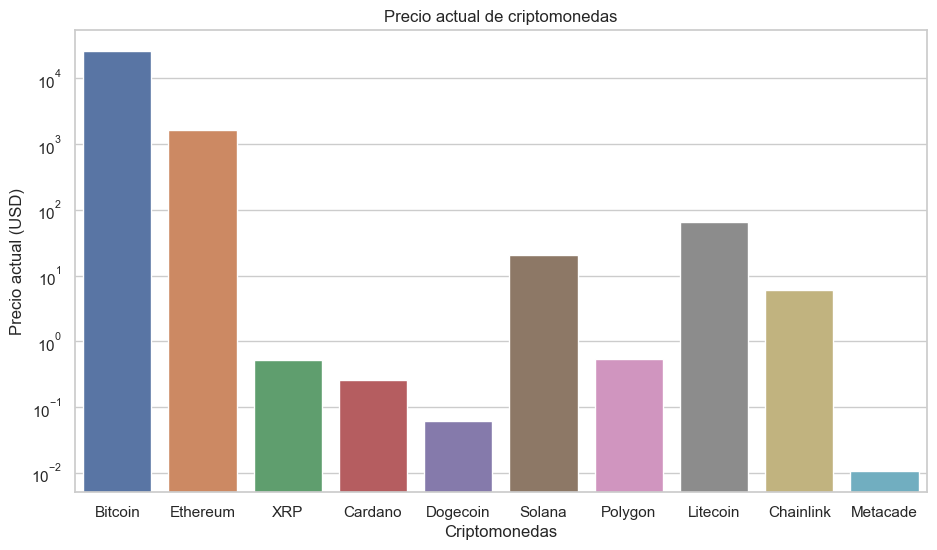

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(11, 6))
sns.barplot(x=coinsData_df['name'],y=coinsData_df['current_price'])
plt.yscale('log') 
plt.xlabel("Criptomonedas")
plt.ylabel("Precio actual (USD)")
plt.title("Precio actual de criptomonedas")
plt.show()

Como se puede apreciar en el gráfico, actualmente el Bitcoin destaca como la moneda con el valor más alto. Le sigue Ethereum y Litecoin en orden descendente de precios. Esta información adquiere una relevancia significativa, ya que brinda a nuestros clientes la capacidad de tomar decisiones informadas respecto a sus inversiones en criptomonedas. Al contar con claridad acerca de la posición de cada moneda en términos de precio, los usuarios pueden evaluar de manera más eficiente si las opciones se ajustan a sus presupuestos y objetivos financieros.

 `market_cap` es la capitalización de mercado de la criptomoneda, que es el producto del precio actual por la cantidad total de unidades en circulación.

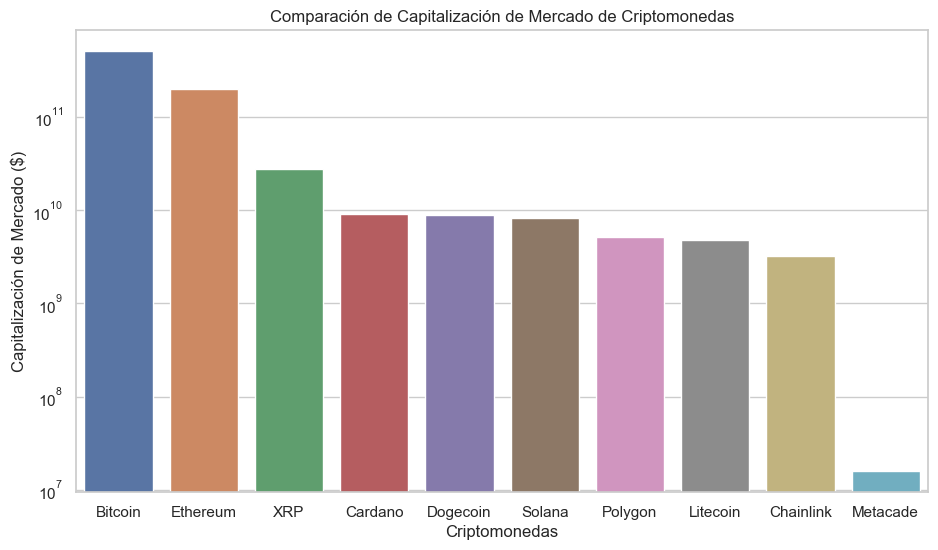

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(11, 6))
sns.barplot(x=coinsData_df['name'],y=coinsData_df['market_cap'])
plt.yscale('log') 
plt.xlabel('Criptomonedas')
plt.ylabel('Capitalización de Mercado ($)')
plt.title('Comparación de Capitalización de Mercado de Criptomonedas')
plt.show()

En este gráfico, se lleva a cabo una evaluación integral que abarca no solo el precio individual de cada criptomoneda, sino también la cantidad de unidades en circulación. Esto arroja luz sobre la capitalización del mercado de cada moneda, es decir, su valor total en el mercado. Al analizar la información representada, queda patente que tanto Bitcoin como Ethereum destacan como las monedas con la mayor capitalización en el mercado. Esta prominencia se deriva tanto de su precio individual como de la considerable cantidad de unidades en circulación.

No obstante, el análisis también revela que hay una criptomoneda, Metacade, que ostenta la menor capitalización en el mercado. Esta diferencia en la capitalización resalta la variabilidad de tamaños entre las distintas monedas, lo cual puede reflejar su adopción, demanda y posición en el mercado financiero.







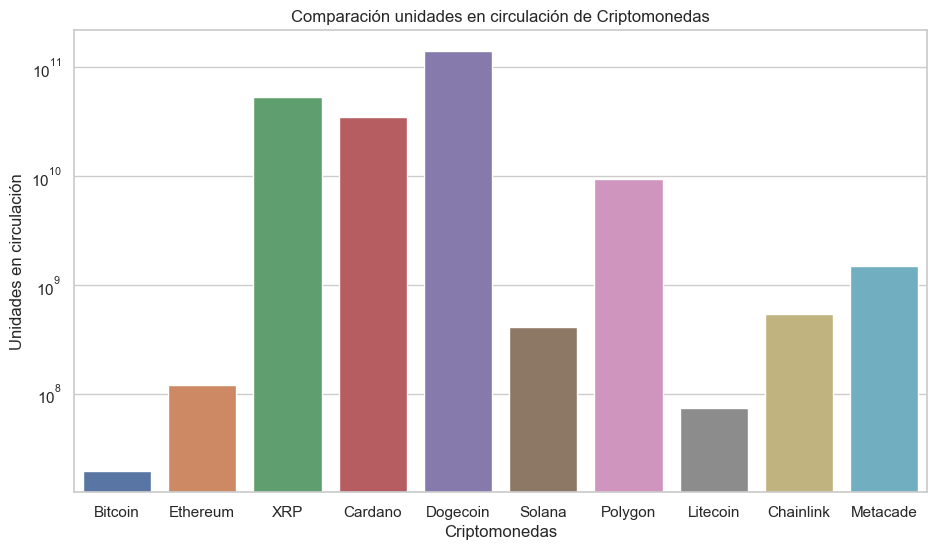

In [83]:
sns.set(style='whitegrid')
plt.figure(figsize=(11, 6))
sns.barplot(x=coinsData_df['name'],y=coinsData_df['circulating_supply'])
plt.yscale('log') 
plt.xlabel('Criptomonedas')
plt.ylabel('Unidades en circulación')
plt.title('Comparación unidades en circulación de Criptomonedas')
plt.show()

Se presenta el recuento de unidades en circulación de cada criptomoneda. A partir de este gráfico, es evidente que la alta capitalización en el mercado de monedas como Bitcoin y Ethereum se origina en gran medida debido a sus valores de precio, y no tanto por sus respectivas cantidades de unidades en circulación. En el panorama actual, las monedas Dogecoin y Ripple (XRP) ocupan una posición predominante en el top de las 10 monedas que hemos seleccionado en términos de unidades en circulación. Esta observación sugiere que la popularidad y adopción de estas monedas pueden estar relacionadas con su amplia distribución en el mercado financiero.

                                                 Crecimiento Histórico

Se grafican las siguientes variables de todas las criptomonedas con el objetivo de observar cuales han sido los precios mas alto y mas bajos de cada una de ellas. Este enfoque nos permite identificar los intervalos en los cuales fluctúan dichos precios, proporcionándonos información esencial para la toma de decisiones. 

`ath` (all-time high): Es el precio más alto histórico alcanzado por la criptomoneda. $\\$
`ath_date`: Es la fecha en que la criptomoneda alcanzó su precio más alto histórico.

`atl` (all-time low): Es el precio más bajo histórico alcanzado por la criptomoneda. $\\$
`atl_date`: Es la fecha en que la criptomoneda alcanzó su precio más bajo histórico.

In [11]:
#Se cambia el formato de las fechas para los precios mas altos.
lis=[]
for i in coinsData_df['ath_date']:
    date=dt.strptime(i, "%Y-%m-%dT%H:%M:%S.%fZ")
    lis.append(date.year)
coinsData_df['ath_date']=lis
#Se cambia el formato de las fechas para los precios mas bajos.
lis2=[]
for i in coinsData_df['atl_date']:
    date=dt.strptime(i, "%Y-%m-%dT%H:%M:%S.%fZ")
    lis2.append(date.year)
coinsData_df['atl_date']=lis2

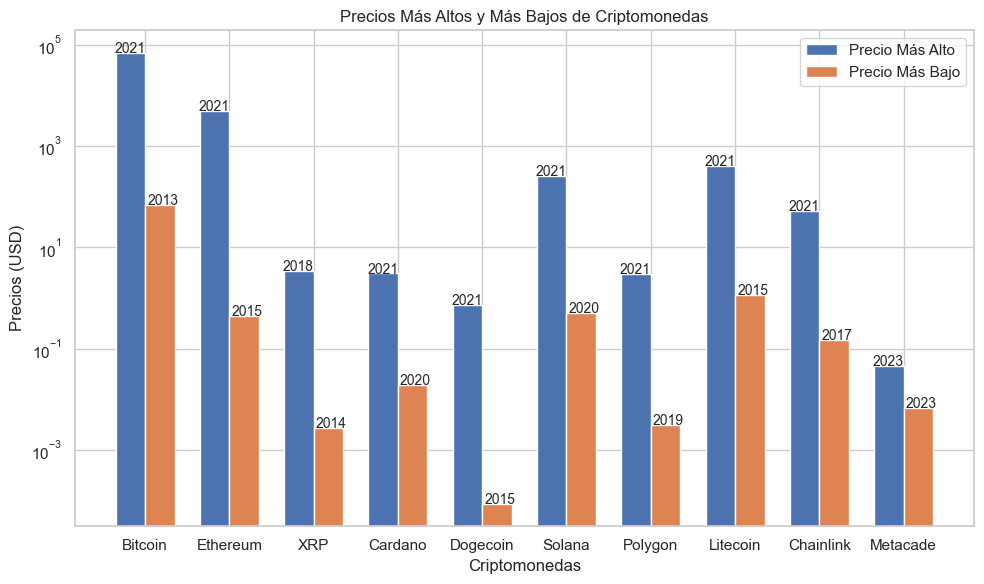

In [85]:
# Se guardan como diccionario en la variable 'data' los datos de precio tanto altos como bajos para cada criptomoneda
data = {
    'Bitcoin': [coinsData_df['ath'][0], coinsData_df['atl'][0]],
    'Ethereum': [coinsData_df['ath'][1], coinsData_df['atl'][1]],
    'XRP': [coinsData_df['ath'][2], coinsData_df['atl'][2]],
    'Cardano':[coinsData_df['ath'][3],coinsData_df['atl'][3]],
    'Dogecoin':[coinsData_df['ath'][4],coinsData_df['atl'][4]],
    'Solana':[coinsData_df['ath'][5],coinsData_df['atl'][5]],
    'Polygon':[coinsData_df['ath'][6],coinsData_df['atl'][6]],
    'Litecoin':[coinsData_df['ath'][7],coinsData_df['atl'][7]],
    'Chainlink':[coinsData_df['ath'][8],coinsData_df['atl'][8]],
    'Metacade':[coinsData_df['ath'][9],coinsData_df['atl'][9]]
}

# Se obtienen los nombre 
criptomonedas = list(data.keys())
precios_altos = [d[0] for d in data.values()]
precios_bajos = [d[1] for d in data.values()]

# Crear el gráfico de barras
sns.set(style='whitegrid')
bar_width = 0.35  
index = range(len(criptomonedas))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, precios_altos, bar_width, label='Precio Más Alto')
bar2 = ax.bar([i + bar_width for i in index], precios_bajos, bar_width, label='Precio Más Bajo')

ax.set_xlabel('Criptomonedas')
ax.set_ylabel('Precios (USD)')
ax.set_title('Precios Más Altos y Más Bajos de Criptomonedas')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(criptomonedas)
ax.legend()
plt.yscale('log') 
plt.text(-0.19,69045,2021,fontsize=10)
plt.text(0.81,4878.26,2021,fontsize=10)
plt.text(1.81,3.4,2018,fontsize=10)
plt.text(2.81,3,2021,fontsize=10)
plt.text(3.81,0.731578,2021,fontsize=10)
plt.text(4.81,259.96,2021,fontsize=10)
plt.text(5.81,2.92,2021,fontsize=10)
plt.text(6.81,410.26,2021,fontsize=10)
plt.text(7.81,52.7,2021,fontsize=10)
plt.text(8.81,0.045050,2023,fontsize=10)

plt.text(0.2,67.81,2013,fontsize=10)
plt.text(1.2,0.432979,2015,fontsize=10)
plt.text(2.2,0.002686,2014,fontsize=10)
plt.text(3.2,0.019253,2020,fontsize=10)
plt.text(4.2,0.000087,2015,fontsize=10)
plt.text(5.2,0.500801,2020,fontsize=10)
plt.text(6.2,0.003144,2019,fontsize=10)
plt.text(7.2,1.15,2015,fontsize=10)
plt.text(8.2,0.148183,2017,fontsize=10)
plt.text(9.2,0.006607,2023,fontsize=10)

plt.tight_layout()
plt.show()



En el análisis, se destaca cómo las monedas de Bitcoin y Ethereum han alcanzado los valores más altos en términos de precios. No obstante, es crucial examinar a fondo las razones detrás de las notables discrepancias en la proporción entre sus valores máximos y mínimos. Comprender por qué algunas de estas monedas muestran una marcada diferencia entre su valor máximo y mínimo es un paso fundamental. Es imprescindible entender las circunstancias subyacentes que han dado lugar a un valor mínimo particularmente bajo. Variados factores específicos del mercado, eventos noticiosos o cambios en la criptomoneda en cuestión pueden haber influido en esta situación.

Tomemos el caso de Dogecoin como ejemplo. Aquí, se observa cómo su valor mínimo ha sido significativamente bajo en comparación con su valor máximo. Para abordar adecuadamente este fenómeno, es crucial investigar en profundidad qué eventos o condiciones llevaron a esta disparidad. Además, analizar cómo otros activos similares se han comportado en contextos similares puede proporcionar perspectivas adicionales.

Teniendo conocimiento acerca de estos eventos y de como ha sido el comportamiento de las criptomonedas en el pasado puede ayudar al cliente a tomar una desición sobre en que invertir.

Graficos de precios

A continuación, se presentan gráficos de precios correspondientes a las 10 monedas seleccionadas. Estos gráficos visualizan de manera clara cómo ha variado el precio de cada criptomoneda a lo largo del tiempo, desde su surgimiento hasta la actualidad. Estas representaciones visuales son herramientas valiosas que permiten identificar patrones y tendencias en la trayectoria de los precios de estas criptomonedas.

Las gráficas de precios desvelan tendencias que pueden ser ascendentes (indicativas de alzas), descendentes (señalando bajas) o laterales (indicando cambios mínimos). Al analizar estas tendencias en conjunto, los inversores pueden obtener una comprensión más profunda de cómo ha evolucionado el valor de cada moneda en el mercado.

Adicionalmente, al tener en cuenta eventos relevantes, como anuncios importantes o lanzamientos de productos, y al superponerlos en las gráficas de precios, los clientes pueden evaluar cómo estos acontecimientos específicos han influenciado el comportamiento de los precios. Esta información puede ser un recurso valioso para tomar decisiones informadas sobre la inversión en una determinada moneda. Al observar cómo los eventos impactan en las tendencias de los precios, los inversionistas están en mejor posición para decidir si desean invertir o no en la moneda.

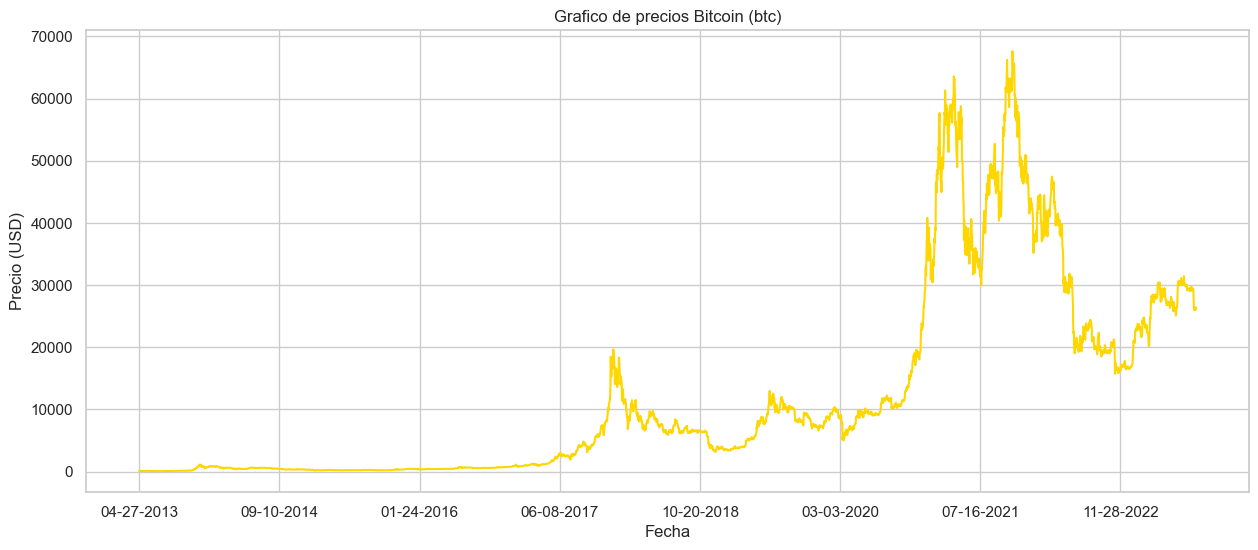

In [104]:
Historical_Data2=cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data2['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='gold')
plt.title('Grafico de precios Bitcoin (btc)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')

plt.show()

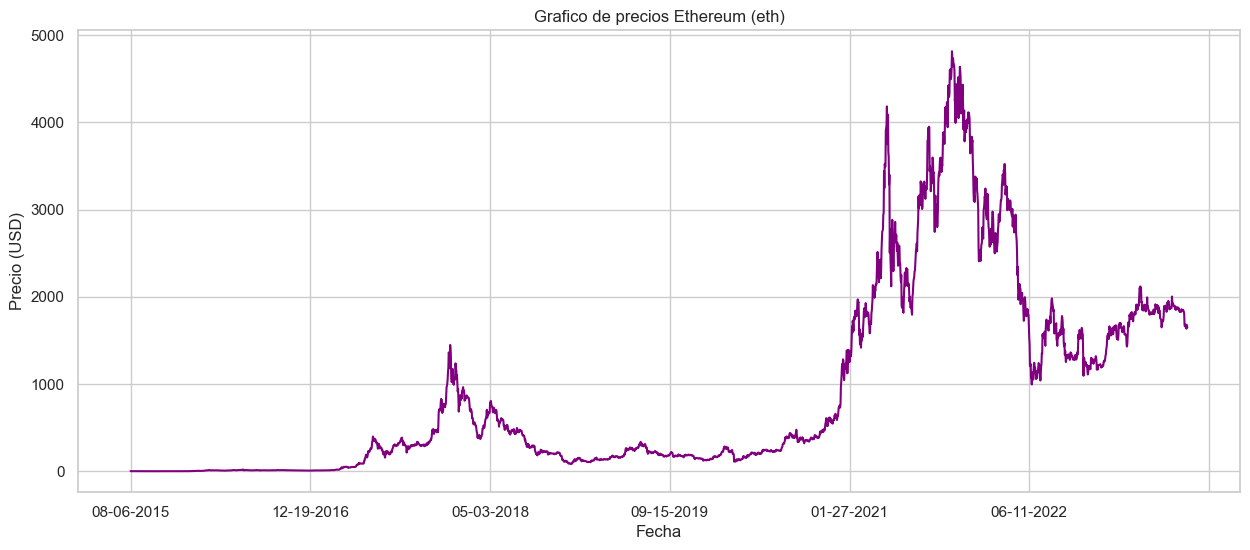

In [105]:
Historical_Data2=cg.get_coin_market_chart_by_id(id='ethereum',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data2['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='Purple')
plt.title('Grafico de precios Ethereum (eth)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

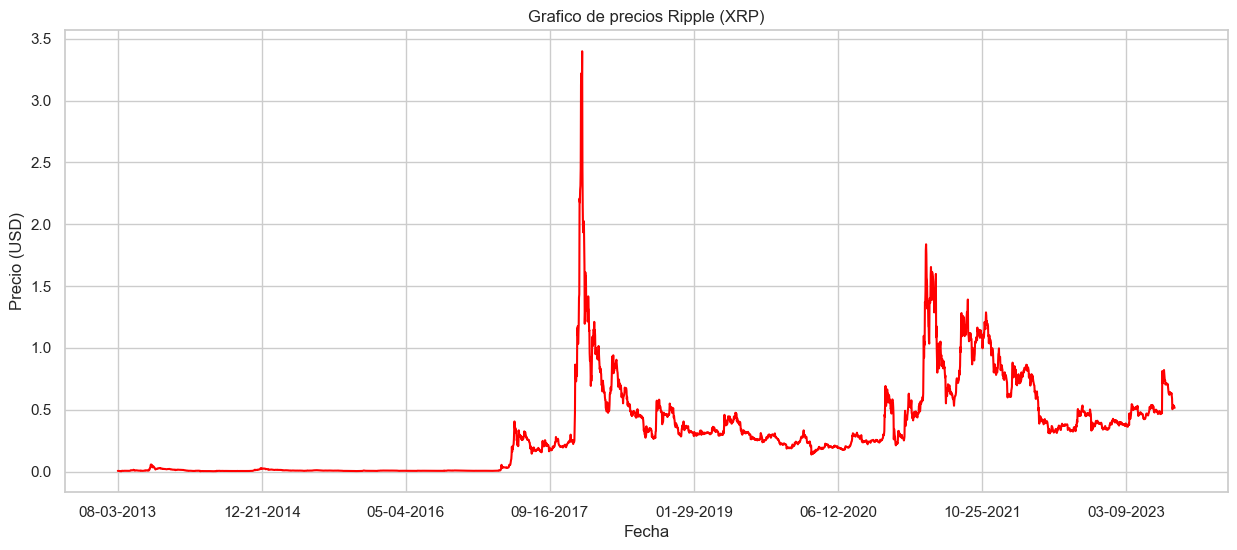

In [106]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='ripple',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='red')
plt.title('Grafico de precios Ripple (XRP)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

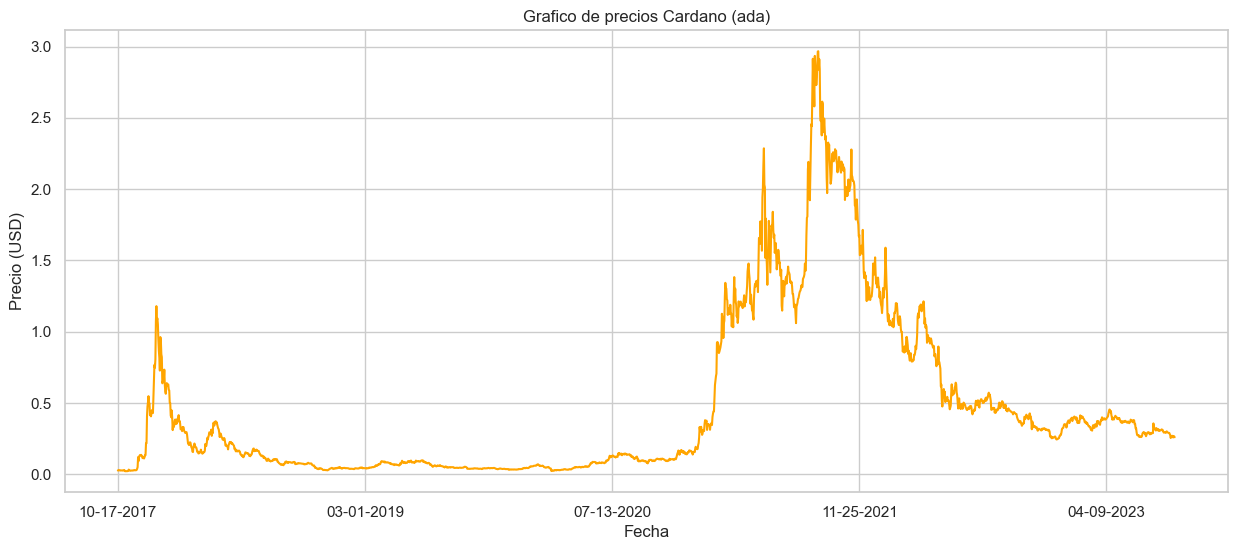

In [107]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='cardano',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='orange')
plt.title('Grafico de precios Cardano (ada)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

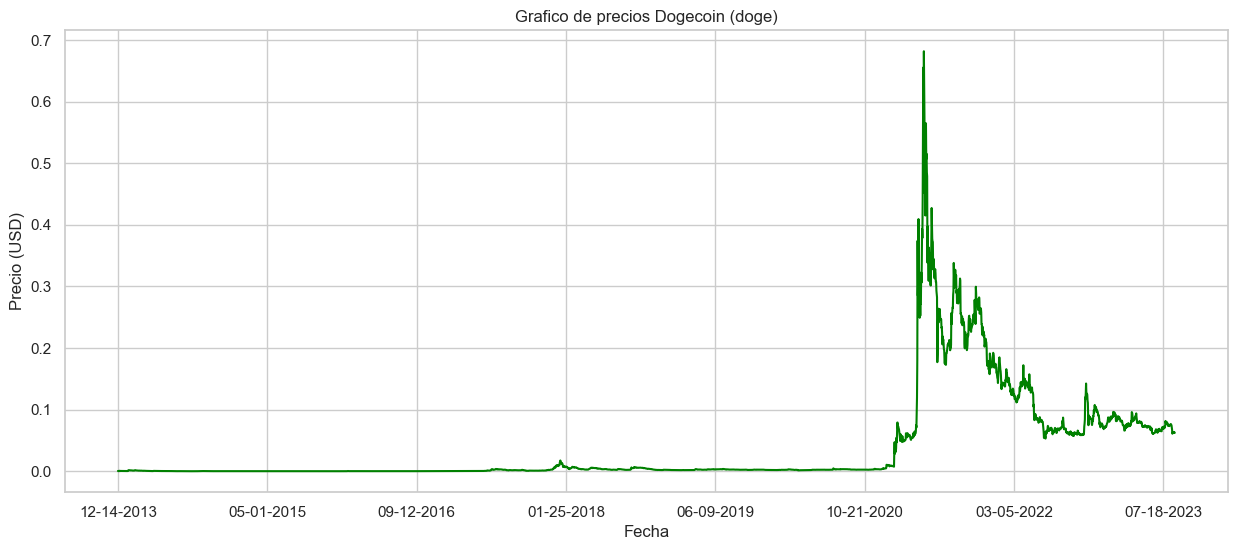

In [108]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='dogecoin',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='green')
plt.title('Grafico de precios Dogecoin (doge)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

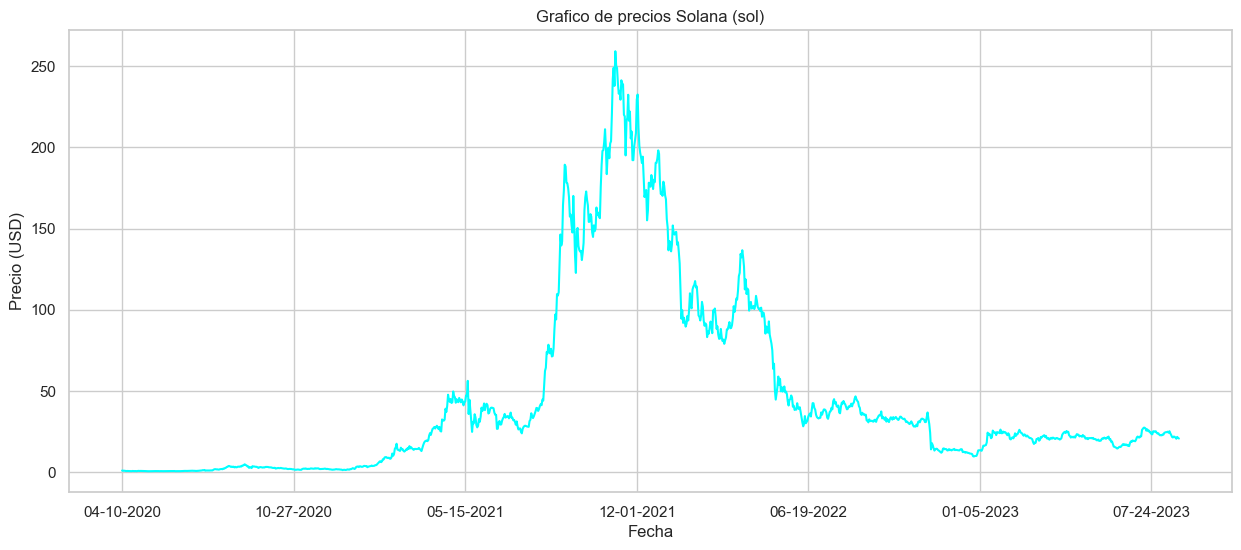

In [109]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='solana',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='cyan')
plt.title('Grafico de precios Solana (sol)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

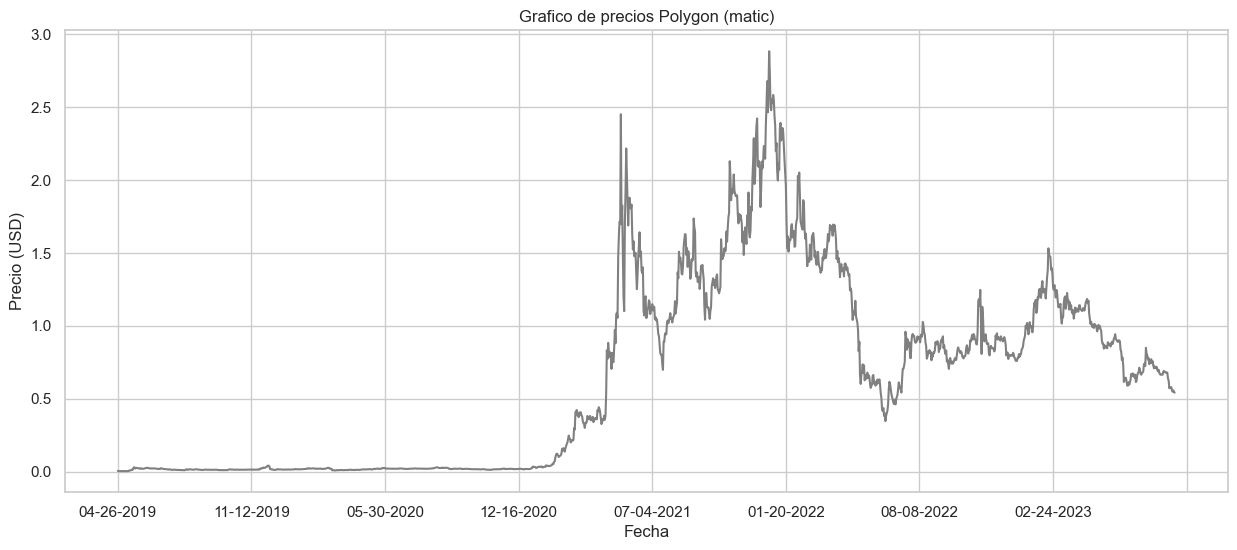

In [110]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='matic-network',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='gray')
plt.title('Grafico de precios Polygon (matic)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

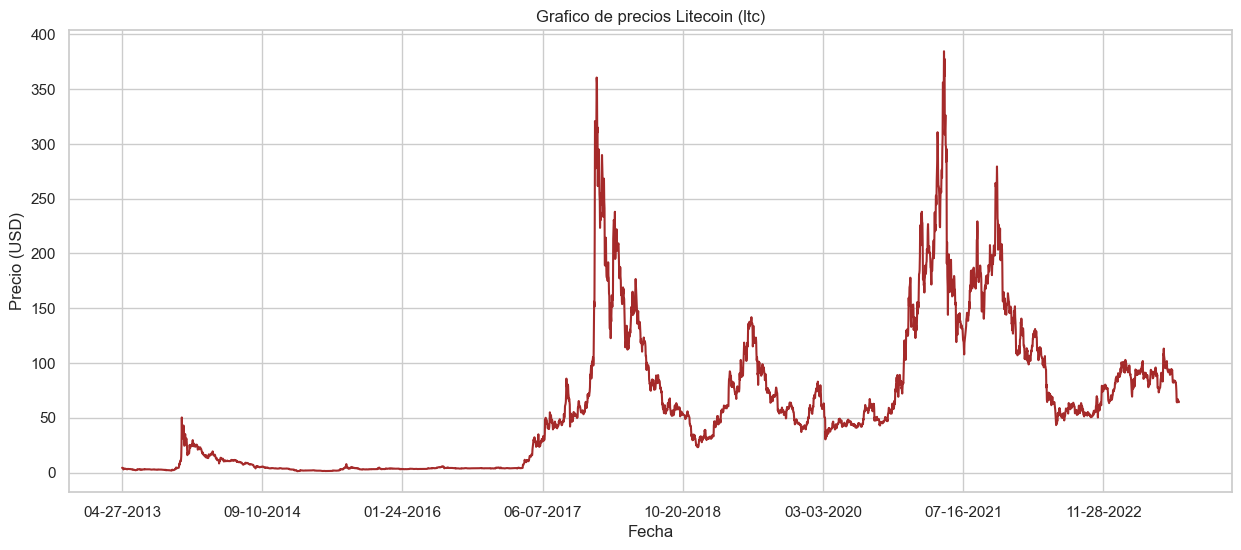

In [111]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='litecoin',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='brown')
plt.title('Grafico de precios Litecoin (ltc)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

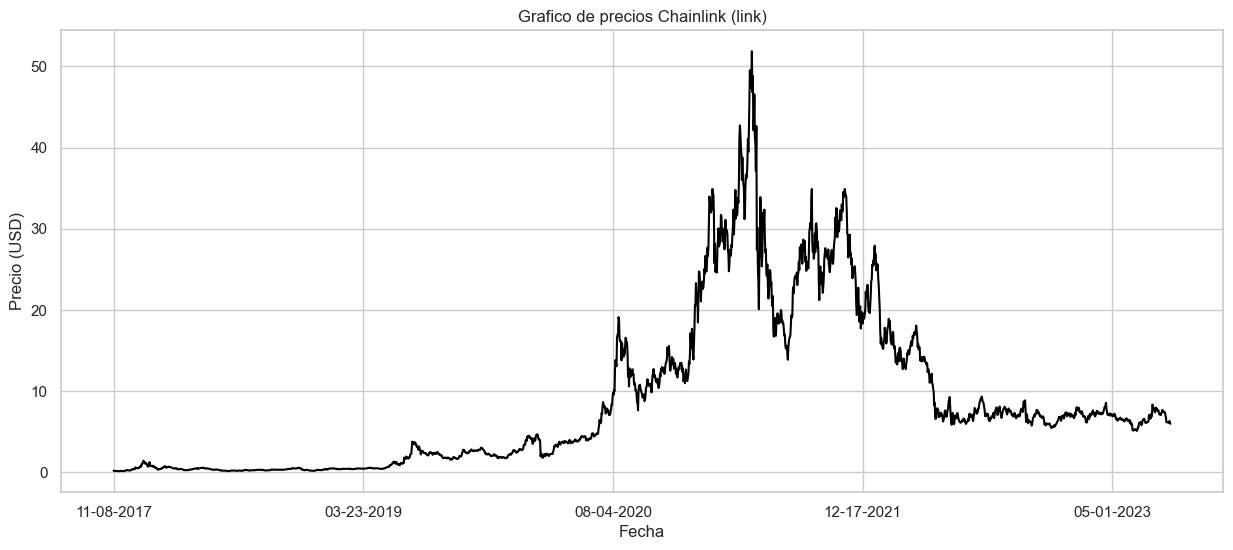

In [112]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='chainlink',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='Black')
plt.title('Grafico de precios Chainlink (link)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

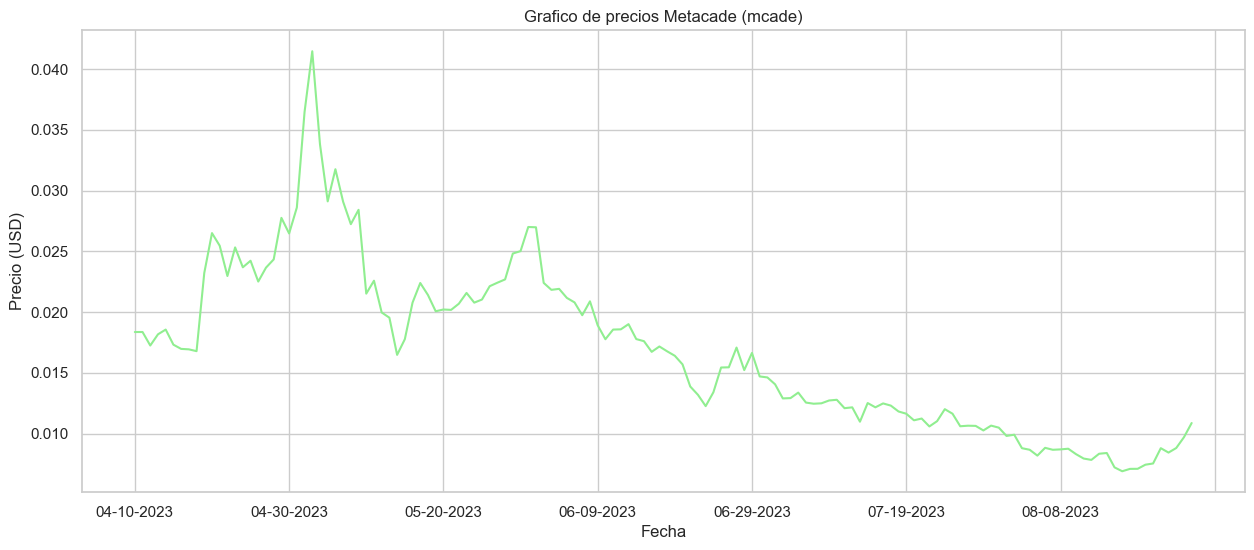

In [113]:
Historical_Data3=cg.get_coin_market_chart_by_id(id='metacade',vs_currency='usd',days='max')
crecimiento_historico_df=pd.DataFrame(data=Historical_Data3['prices'],columns=['Date','Price'])
crecimiento_historico_df['Date']=crecimiento_historico_df['Date'].apply(
    lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y')
)
crecimiento_historico_df=crecimiento_historico_df.set_index('Date')
sns.set(style='whitegrid')
crecimiento_historico_df['Price'].plot(figsize=(15,6), color='lightgreen')
plt.title('Grafico de precios Metacade (mcade)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

                                                 Volatilidad y riesgo
                                                 

Se grafico la variable `price_change_percentage_24h` que permite evaluar la volatilidad reciente de los precios de las criptomonedas en las últimas 24 horas y, por extensión, discutir la naturaleza volátil del mercado y la necesidad de gestionar el riesgo

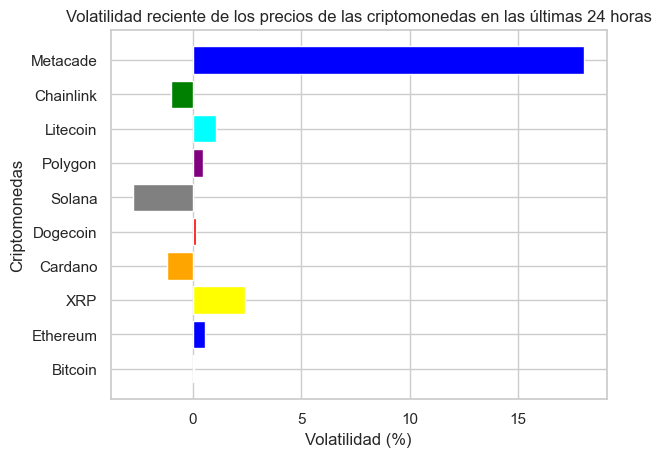

In [114]:
plt.barh(coinsData_df['name'], coinsData_df['price_change_percentage_24h'], color=['green','blue','yellow','orange','red','gray','purple','cyan'])
plt.xlabel('Volatilidad (%)')
plt.ylabel('Criptomonedas')
plt.title('Volatilidad reciente de los precios de las criptomonedas en las últimas 24 horas')
plt.show()

Considerando el análisis de las gráficas de precios, es evidente que la criptomoneda Metacade exhibe en la actualidad una notoria volatilidad, principalmente atribuible a su reciente y constante aumento de valor. No obstante, es relevante destacar que esta criptomoneda mantiene un precio modesto, lo que implica que la magnitud de esta volatilidad podría no conllevar una significativa variación monetaria.

Por otra parte, llama la atención el comportamiento de la criptomoneda Solana, que muestra una volatilidad de tendencia "negativa". Este fenómeno persiste a pesar de que su comportamiento reciente denota una fase de estabilidad en los precios.

                                                 Adopción y Participación del Mercado

Se grafico la variable `market_cap_rank` que hace referencia a la posición de la criptomoneda en términos de capitalización de mercado en relación con otras criptomonedas.

In [15]:
ultima_moneda=coinsData_df['name'][9]
monedas=coinsData_df['name'][:-1]
posiciones_monedas=coinsData_df['market_cap_rank'][:-1]

Text(7.95, 24.5, '24')

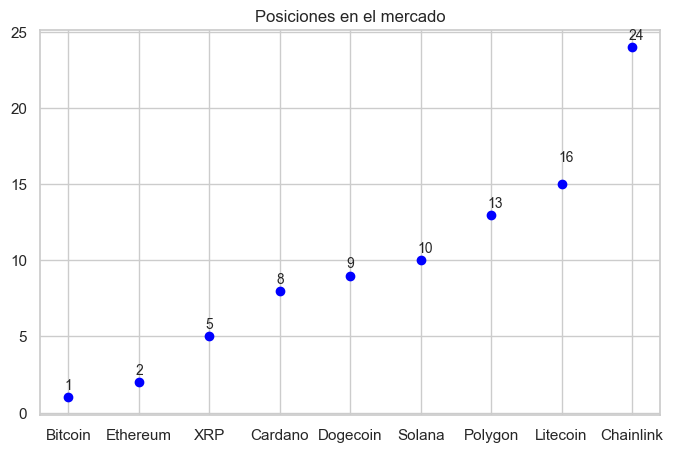

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(monedas, posiciones_monedas, color='blue', label='Otros participantes', marker='o')
plt.title('Posiciones en el mercado')
plt.text(-0.05,1.5,1,fontsize=10)
plt.text(0.95,2.5,2,fontsize=10)
plt.text(1.95,5.5,5,fontsize=10)
plt.text(2.95,8.5,8,fontsize=10)
plt.text(3.95,9.5,9,fontsize=10)
plt.text(4.95,10.5,10,fontsize=10)
plt.text(5.95,13.5,13,fontsize=10)
plt.text(6.95,16.5,16,fontsize=10)
plt.text(7.95,24.5,24,fontsize=10)

La posición en el ranking de capitalización de mercado proporciona una idea instantánea de la importancia de una criptomoneda en el panorama general. Las criptomonedas con clasificaciones más altas generalmente son más conocidas y ampliamente adoptadas. Teniendo esto en cuenta podemos observar que la mayoria de las monedas que se escogieron se encuentran entre las 25 monedas mejor posicionadas en terminos de capitalización del mercado a excepsion de chainlink que se encuentra en el puesto 733 actualmente como se observa en el grafico a continuación.

Text(8.95, 725.5, '733')

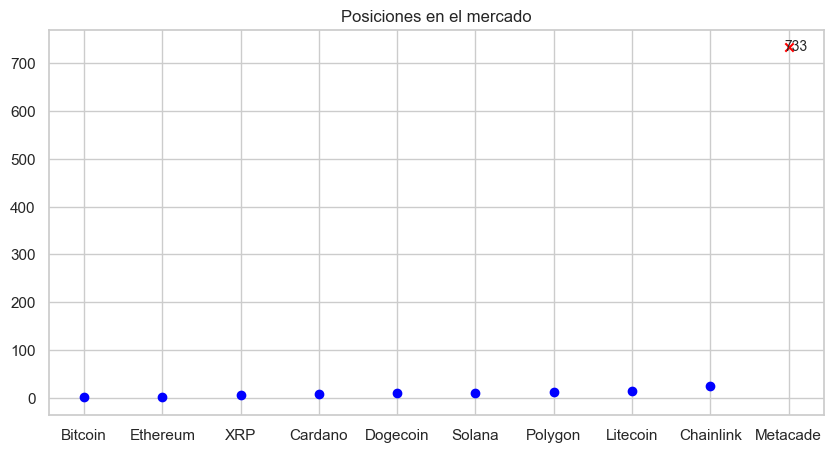

In [96]:
plt.figure(figsize=(10, 5))
plt.scatter(monedas, posiciones_monedas, color='blue', label='Otros participantes', marker='o')
plt.scatter(ultima_moneda, coinsData_df['market_cap_rank'][9], color='red', label='Último participante', marker='x')
plt.title('Posiciones en el mercado')
plt.text(8.95,725.5,coinsData_df['market_cap_rank'][9],fontsize=10)